In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [145]:
csv_name = 'events_2020_msu'
events = pd.read_csv('./{}.csv'.format(csv_name), low_memory=False)
events

,tulos,vapaataival,vapaa,vaara,koordinaatitX,koordinaatitY,jokerHat,lyoja,lyojaVieras,vvo,...,endtime,lyonti,karkaaminen,tyyppi,lyoty,expiry,pesat0,pesat1,pesat2,pesat3
0,Vapaa,False,NaN,False,NaN,NaN,False,Topi Korhonen,1,False,...,3843.149438,1,False,NaN,True,NaN,Topi Korhonen,Antti Korhonen,Joni Rytkönen,NaN
1,Vapaa,False,NaN,False,NaN,NaN,False,Ossi Meriläinen,1,False,...,10104.901373,3,False,NaN,True,NaN,Ossi Meriläinen,Marko Pelkonen,Jonne Luhtavaara,Onni Määttä
2,Vapaa,False,NaN,False,NaN,NaN,False,Heikki Savikoski,1,False,...,5146.507994,1,False,NaN,True,NaN,Heikki Savikoski,Aki Hanhela,NaN,Marko Pelkonen
3,Palo,False,NaN,False,NaN,NaN,False,Lauri Rönkkö,1,False,...,3960.854124,3,False,NaN,True,NaN,Lauri Rönkkö,Roope Korhonen,Topi Korhonen,Antti Korhonen
4,Kärkilyönti,False,NaN,False,NaN,NaN,False,Lauri Rönkkö,1,False,...,5852.765227,2,False,NaN,True,NaN,Lauri Rönkkö,NaN,Roope Korhonen,Topi Korhonen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63077,Vapaa,False,NaN,False,NaN,NaN,False,Simo Vainikainen,1,False,...,2225.170570,2,False,NaN,True,NaN,Simo Vainikainen,Aleksi Rautiainen,NaN,NaN
63078,Vapaa,False,NaN,False,0.68441,0.510050,False,Janne Mäkelä,1,False,...,8898.862061,1,False,kumura,True,NaN,Janne Mäkelä,NaN,NaN,Perttu Ruuska
63079,Kärkilyönti,False,NaN,False,NaN,NaN,False,Jere Saukko,1,False,...,10492.177609,1,False,NaN,True,NaN,Jere Saukko,NaN,NaN,NaN
63080,Vapaa,False,NaN,False,NaN,NaN,False,Mikko Kanala,1,False,...,2657.768973,1,False,NaN,True,NaN,Mikko Kanala,Olli Heikkala,NaN,NaN


In [146]:
events.columns

Index(['tulos', 'vapaataival', 'vapaa', 'vaara', 'koordinaatitX',
       'koordinaatitY', 'jokerHat', 'lyoja', 'lyojaVieras', 'vvo', 'changes0',
       'changes1', 'changes2', 'changes3', 'lukkari', 'date', 'palot',
       'karpanen', 'lyojaKoti', 'streamUrl', 'tilanne', 'merkattuLaiton', 'up',
       'gameId', 'sp', 'karki', 'sisalla', 'phaseDone', 'eventId', 'kl',
       'starttime', 'mitataanAika', 'endtime', 'lyonti', 'karkaaminen',
       'tyyppi', 'lyoty', 'expiry', 'pesat0', 'pesat1', 'pesat2', 'pesat3'],
      dtype='object')

# Datan filtteröinti

In [147]:
ev = events[['tulos', 'lyonti', 'tilanne', 'sp', 'palot', 'tyyppi']]

ev = ev[ev['tyyppi'] != 'kopinnosto']

ajot = ev[ev['tilanne'].isin(['Ajo'])]
kakkoset = ev[ev['tilanne'].isin(['1-2'])]
ykkoset = ev[ev['tilanne'].isin(['1', 1])]

merkatut_ajot = ajot[ajot['tulos'] != 'Vapaa']
merkatut_kakkoset = kakkoset[kakkoset['tulos'] != 'Vapaa']
merkatut_ykkoset = ykkoset[ykkoset['tulos'] != 'Vapaa']

# Osuudet lyönneittäin

In [148]:
ykkostilanne = merkatut_ykkoset.groupby(by='lyonti').count().tulos
kakkostilanne = merkatut_kakkoset.groupby(by='lyonti').count().tulos
kolmostilanne = merkatut_ajot.groupby(by='lyonti').count().tulos

maara1 = ykkostilanne.sum()
maara2 = kakkostilanne.sum()
maara3 = kolmostilanne.sum()

first_hits = pd.Series([
    ykkostilanne[1] / maara1 * 100, 
    kakkostilanne[1] / maara2 * 100, 
    kolmostilanne[1] / maara3 * 100
])
second_hits = pd.Series([
    ykkostilanne[2] / maara1 * 100, 
    kakkostilanne[2] / maara2 * 100, 
    kolmostilanne[2] / maara3 * 100
])
third_hits = pd.Series([
    ykkostilanne[3] / maara1 * 100, 
    kakkostilanne[3] / maara2 * 100, 
    kolmostilanne[3] / maara3 * 100
])

df = pd.DataFrame(
    np.array([first_hits, second_hits, third_hits])
    , columns=['1-tilanne', '2-tilanne', '3-tilanne'], index=[1, 2, 3])

[ykkostilanne.sum(), kakkostilanne.sum(), kolmostilanne.sum()]

[6803, 5103, 3845]

# Paloittain

In [149]:
ykkostilanne_ensimmainen_paloittain = merkatut_ykkoset[merkatut_ykkoset['lyonti'] == 1].groupby(by='palot').count()
ykkostilanne_toinen_paloittain = merkatut_ykkoset[merkatut_ykkoset['lyonti'] == 2].groupby(by='palot').count()
ykkostilanne_kolmas_paloittain = merkatut_ykkoset[merkatut_ykkoset['lyonti'] == 3].groupby(by='palot').count()

kakkostilanne_ensimmainen_paloittain = merkatut_kakkoset[merkatut_kakkoset['lyonti'] == 1].groupby(by='palot').count()
kakkostilanne_toinen_paloittain = merkatut_kakkoset[merkatut_kakkoset['lyonti'] == 2].groupby(by='palot').count()
kakkostilanne_kolmas_paloittain = merkatut_kakkoset[merkatut_kakkoset['lyonti'] == 3].groupby(by='palot').count()

kolmostilanne_ensimmainen_paloittain = merkatut_ajot[merkatut_ajot['lyonti'] == 1].groupby(by='palot').count()
kolmostilanne_toinen_paloittain = merkatut_ajot[merkatut_ajot['lyonti'] == 2].groupby(by='palot').count()
kolmostilanne_kolmas_paloittain = merkatut_ajot[merkatut_ajot['lyonti'] == 3].groupby(by='palot').count()

kolmostilanne_kolmas_paloittain

,tulos,lyonti,tilanne,sp,tyyppi
palot,,,,,
0,352,352,352,352,59
1,503,503,503,503,66
2,377,377,377,377,60


# Piirretään barit

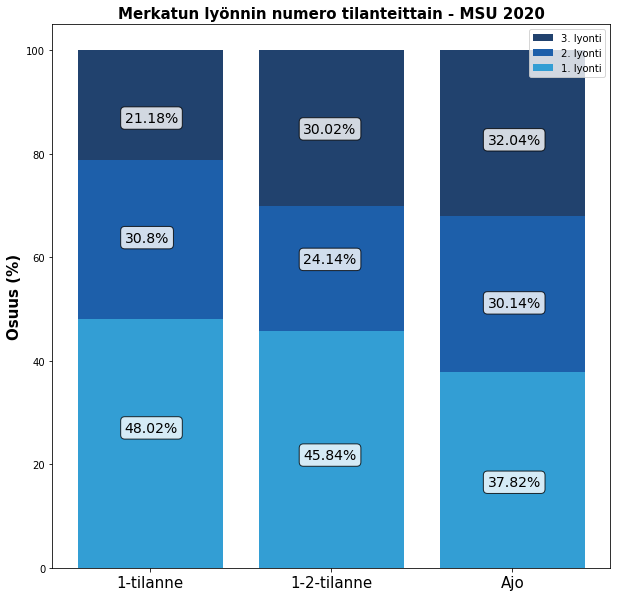

In [150]:
# fig, axs = plt.subplots(1, 3, figsize = (10, 10))
fig, ax = plt.subplots(figsize = (10, 10))

lyontien_nimet = ['1. lyonti', '2. lyonti', '3. lyonti']

ind = np.arange(3)

p3 = plt.bar(ind, third_hits, width=0.8, color="#21426E", label="3. lyonti", bottom=first_hits + second_hits)
p2 = plt.bar(ind, second_hits, width=0.8, color="#1D5FAA", label="2. lyonti", bottom=first_hits)
p1 = plt.bar(ind, first_hits, width=0.8, color="#339ED4", label="1. lyonti")

plt.legend()

ax.set_ylabel('Osuus (%)', fontweight ='bold', fontsize = 15)
ax.set_title('Merkatun lyönnin numero tilanteittain - MSU 2020', fontweight ='bold', fontsize = 15)
plt.xticks(ind, ('1-tilanne', '1-2-tilanne', 'Ajo'), fontsize=15)

props = dict(boxstyle='round', facecolor='white', alpha=0.8)


ax.text(0.13, 0.25, '{}%'.format(round(first_hits[0], 2)), transform=ax.transAxes, fontsize=14, bbox=props)
ax.text(0.45, 0.20, '{}%'.format(round(first_hits[1], 2)), transform=ax.transAxes, fontsize=14, bbox=props)
ax.text(0.78, 0.15, '{}%'.format(round(first_hits[2], 2)), transform=ax.transAxes, fontsize=14, bbox=props)

ax.text(0.13, 0.6, '{}%'.format(round(second_hits[0], 2)), transform=ax.transAxes, fontsize=14, bbox=props)
ax.text(0.45, 0.56, '{}%'.format(round(second_hits[1], 2)), transform=ax.transAxes, fontsize=14, bbox=props)
ax.text(0.78, 0.48, '{}%'.format(round(second_hits[2], 2)), transform=ax.transAxes, fontsize=14, bbox=props)

ax.text(0.13, 0.82, '{}%'.format(round(third_hits[0], 2)), transform=ax.transAxes, fontsize=14, bbox=props)
ax.text(0.45, 0.8, '{}%'.format(round(third_hits[1], 2)), transform=ax.transAxes, fontsize=14, bbox=props)
ax.text(0.78, 0.78, '{}%'.format(round(third_hits[2], 2)), transform=ax.transAxes, fontsize=14, bbox=props)

plt.show()

fig.savefig('./merkatut_lyonneittain_{}.png'.format(csv_name))